In [53]:
#%pip install pandas

In [54]:
#%pip install imblearn

In [55]:
import pandas as pd
import numpy as np 

In [56]:
df = pd.read_csv("OriginalData.csv") 

# Preprocessing

In [57]:
df.head()

,AppointmentID,PatientID,ClinicNM,AppointmentDTS,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,SexFLG,HispanicFLG,...,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR,NoShowFLG,CancelledLateFLG
0,21725,1,E,4/10/18,4,3,17,50,F,0,...,50.0,-1.0,2.0,2.0,0.0,0.0,0,0,1,0
1,11206,2,A,2/7/18,2,4,10,80,M,0,...,49.0,1.0,2.0,1.0,5.0,0.0,0,0,0,1
2,12548,2,A,2/8/18,2,5,16,80,M,0,...,49.0,1.0,2.0,1.0,6.0,0.0,0,0,0,0
3,12727,2,A,3/8/18,3,5,15,80,M,0,...,48.0,7.0,3.0,1.0,8.0,0.0,0,0,0,0
4,86882,2,A,11/9/18,11,6,16,80,M,0,...,47.0,13.0,3.0,1.0,13.0,0.0,0,0,0,0


In [58]:
df.describe()

,AppointmentID,PatientID,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,HispanicFLG,SingleFLG,LivesInApartmentFLG,EmailFLG,...,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR,NoShowFLG,CancelledLateFLG
count,95221.000000,95221.000000,95221.000000,95221.000000,95221.000000,95221.000000,95221.000000,95221.000000,95221.000000,95221.000000,...,88456.000000,91105.000000,93605.000000,93605.000000,93605.000000,93605.000000,95221.000000,95221.000000,95221.000000,95221.000000
mean,47611.000000,16752.134582,6.561452,3.988101,12.011353,44.532792,0.129520,0.553649,0.196343,0.490522,...,42.321787,6.913781,13.982789,6.281652,15.921564,0.071268,0.649426,0.021109,0.095630,0.159849
std,27488.079328,9649.346171,3.344395,1.391333,2.769707,22.984130,0.335776,0.497116,0.397233,0.499913,...,72.892606,21.241061,16.276161,5.572236,25.227483,0.131601,2.271323,0.172018,0.294085,0.366468
min,1.000000,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-933.000000,-958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23806.000000,8386.000000,4.000000,3.000000,10.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,31.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47611.000000,16640.000000,6.000000,4.000000,11.000000,46.000000,0.000000,1.000000,0.000000,0.000000,...,48.000000,7.000000,9.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71416.000000,25323.000000,10.000000,5.000000,14.000000,62.000000,0.000000,1.000000,0.000000,1.000000,...,67.000000,13.000000,18.000000,8.000000,21.000000,0.100000,1.000000,0.000000,0.000000,0.000000
max,95221.000000,33473.000000,12.000000,7.000000,19.000000,118.000000,1.000000,1.000000,1.000000,1.000000,...,768.000000,656.000000,276.000000,57.000000,383.000000,1.000000,155.000000,6.000000,1.000000,1.000000


# Number of unique Patients in the data

In [59]:
df['PatientID'].nunique()

33473

In [60]:
df.isnull().sum()

AppointmentID               0
PatientID                   0
ClinicNM                    0
AppointmentDTS              0
AppointmentMonthNBR         0
AppointmentWeekdayNBR       0
AppointmentHourNBR          0
AgeNBR                      0
SexFLG                      0
HispanicFLG                 0
SingleFLG                   0
LivesInApartmentFLG         0
EmailFLG                    0
ApptLagNBR                  0
InsuranceDSC                0
HypertensionFLG             0
AsthmaFLG                   0
HeartDiseaseFLG             0
ObeseFLG                    0
DiabetesFLG                 0
Noshow24NBR              1616
CancellationsNBR         1616
Latearrivals24NBR        1616
CheckintoCheckoutNBR     6765
AppttoCheckoutNBR        6765
CheckintoApptNBR         4116
Arrived24NBR             1616
Providers24CNT           1616
ThatProvider24NBR        1616
NoshowRate24NBR          1616
EdVisitsNBR                 0
IpVisitsNBR                 0
NoShowFLG                   0
CancelledL

In [61]:
showdf = df[ df['NoShowFLG'] == 0]

In [62]:
showdf.isnull().sum()

AppointmentID               0
PatientID                   0
ClinicNM                    0
AppointmentDTS              0
AppointmentMonthNBR         0
AppointmentWeekdayNBR       0
AppointmentHourNBR          0
AgeNBR                      0
SexFLG                      0
HispanicFLG                 0
SingleFLG                   0
LivesInApartmentFLG         0
EmailFLG                    0
ApptLagNBR                  0
InsuranceDSC                0
HypertensionFLG             0
AsthmaFLG                   0
HeartDiseaseFLG             0
ObeseFLG                    0
DiabetesFLG                 0
Noshow24NBR              1376
CancellationsNBR         1376
Latearrivals24NBR        1376
CheckintoCheckoutNBR     5772
AppttoCheckoutNBR        5772
CheckintoApptNBR         3545
Arrived24NBR             1376
Providers24CNT           1376
ThatProvider24NBR        1376
NoshowRate24NBR          1376
EdVisitsNBR                 0
IpVisitsNBR                 0
NoShowFLG                   0
CancelledL

In [63]:
noShowDf = df[df['NoShowFLG']==1]

In [64]:
showdf.dropna().describe()

,AppointmentID,PatientID,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,HispanicFLG,SingleFLG,LivesInApartmentFLG,EmailFLG,...,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR,NoShowFLG,CancelledLateFLG
count,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,...,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.000000,80343.0,80343.000000
mean,47484.477739,16278.279576,6.548984,3.986035,11.963818,46.269445,0.116998,0.531509,0.189413,0.513946,...,42.407665,7.087388,14.788208,6.576677,17.267540,0.060591,0.648096,0.021968,0.0,0.175323
std,27529.684501,9427.043634,3.348095,1.386088,2.765961,22.940206,0.321420,0.499009,0.391839,0.499809,...,71.471632,20.148128,16.454723,5.561190,25.983765,0.108508,2.352977,0.176549,0.0,0.380246
min,2.000000,2.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-933.000000,-958.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,23642.500000,8131.000000,4.000000,3.000000,10.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,31.000000,2.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,47345.000000,15963.000000,6.000000,4.000000,11.000000,49.000000,0.000000,1.000000,0.000000,1.000000,...,48.000000,7.000000,9.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,71359.500000,24535.000000,10.000000,5.000000,14.000000,64.000000,0.000000,1.000000,0.000000,1.000000,...,67.000000,13.000000,19.000000,9.000000,23.000000,0.086956,1.000000,0.000000,0.0,0.000000
max,95221.000000,33473.000000,12.000000,7.000000,19.000000,110.000000,1.000000,1.000000,1.000000,1.000000,...,768.000000,433.000000,276.000000,57.000000,383.000000,0.833333,155.000000,6.000000,0.0,1.000000


### -Ve Values of AppttoCheckoutNBR in show

In [65]:
showdf[showdf['AppttoCheckoutNBR'] <0]

,AppointmentID,PatientID,ClinicNM,AppointmentDTS,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,SexFLG,HispanicFLG,...,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR,NoShowFLG,CancelledLateFLG
27,91011,14,B,12/18/18,12,3,15,69,F,0,...,-18.0,7.0,18.0,6.0,31.0,0.000000,0,0,0,1
37,15417,19,E,2/19/18,2,2,14,48,F,0,...,-19.0,2.0,2.0,1.0,0.0,0.333333,1,0,0,0
183,91619,69,B,12/11/18,12,3,10,23,F,1,...,-5.0,10.0,21.0,18.0,7.0,0.125000,1,0,0,0
191,36677,69,B,5/7/18,5,2,15,23,F,1,...,-40.0,12.0,9.0,8.0,0.0,0.181818,0,0,0,0
192,53484,69,B,7/12/18,7,5,14,23,F,1,...,-2.0,13.0,12.0,11.0,0.0,0.200000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95154,95185,33446,B,12/28/18,12,6,9,30,F,1,...,-54.0,15.0,6.0,6.0,2.0,0.250000,1,0,0,0
95161,85522,33450,B,11/3/18,11,7,11,46,M,1,...,-88.0,7.0,5.0,3.0,0.0,0.285714,0,0,0,0
95164,3790,33450,B,4/12/18,4,5,15,46,M,1,...,-94.0,9.0,3.0,2.0,5.0,0.000000,0,0,0,0
95168,1285,33453,A,6/4/18,6,2,8,60,F,0,...,-4.0,54.0,4.0,2.0,16.0,0.000000,0,0,0,0


### -Ve Values of AppttoCheckoutNBR in Noshow

In [66]:
noShowDf[noShowDf['AppttoCheckoutNBR'] <0]

,AppointmentID,PatientID,ClinicNM,AppointmentDTS,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,SexFLG,HispanicFLG,...,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR,NoShowFLG,CancelledLateFLG
193,48963,69,B,6/21/18,6,5,16,23,F,1,...,-2.0,13.0,12.0,11.0,6.0,0.142857,0,0,1,0
197,22416,69,B,3/15/18,3,5,16,23,F,1,...,-40.0,11.0,7.0,6.0,2.0,0.125000,0,0,1,0
332,23204,118,B,6/14/18,6,5,14,46,M,0,...,-114.0,12.0,5.0,3.0,8.0,0.285714,1,0,1,0
410,39737,156,B,5/16/18,5,4,9,61,F,1,...,-21.0,22.0,17.0,9.0,37.0,0.055555,1,0,1,0
497,50827,189,B,7/16/18,7,2,13,70,F,0,...,-183.0,-11.0,2.0,2.0,0.0,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94952,77919,33380,B,11/1/18,11,5,13,57,M,0,...,-192.0,11.0,18.0,8.0,13.0,0.100000,6,1,1,0
95013,87312,33398,B,11/15/18,11,5,11,83,F,0,...,-39.0,15.0,49.0,11.0,102.0,0.000000,8,0,1,0
95150,13975,33446,B,3/28/18,3,4,14,30,F,1,...,-16.0,13.0,8.0,6.0,2.0,0.272727,1,0,1,0
95160,80255,33450,B,10/17/18,10,4,14,46,M,1,...,-88.0,7.0,5.0,3.0,0.0,0.000000,0,0,1,0


### Age values zero

In [67]:
zeroAges = df[df['AgeNBR'] == 0]
#zeroAges

In [68]:
df[df['Latearrivals24NBR'] > df['ThatProvider24NBR']].head()

,AppointmentID,PatientID,ClinicNM,AppointmentDTS,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,SexFLG,HispanicFLG,...,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR,NoShowFLG,CancelledLateFLG
0,21725,1,E,4/10/18,4,3,17,50,F,0,...,50.0,-1.0,2.0,2.0,0.0,0.000000,0,0,1,0
8,29351,5,C,4/5/18,4,5,10,23,F,0,...,65.0,10.0,27.0,17.0,0.0,0.000000,0,0,0,0
14,2091,9,A,1/26/18,1,6,14,35,M,1,...,47.0,-1.0,5.0,2.0,0.0,0.375000,0,0,1,0
16,23310,11,E,3/15/18,3,5,15,22,F,0,...,72.0,2.0,9.0,7.0,2.0,0.250000,0,0,0,0
17,36467,11,E,5/8/18,5,3,16,22,F,0,...,71.0,3.0,10.0,8.0,3.0,0.230769,0,0,1,0


In [69]:
# Negative samples for CheckintoCheckoutNBR  in noShowDf
negative_samples_CheckintoCheckoutNBR_noShowDf = noShowDf[noShowDf['CheckintoCheckoutNBR'] <0].index.size
negative_samples_CheckintoCheckoutNBR_noShowDf

1006

In [70]:
# Negative samples for CheckintoCheckoutNBR  in ShowDf
negative_samples_CheckintoCheckoutNBR_showdf = showdf[showdf['CheckintoCheckoutNBR'] <0].index.size
negative_samples_CheckintoCheckoutNBR_showdf

7538

In [71]:
# Negative samples for AppttoCheckoutNBR in noShowDf
negative_samples_AppttoCheckoutNBR_noShowDf = noShowDf[noShowDf['AppttoCheckoutNBR'] <0].index.size
negative_samples_AppttoCheckoutNBR_noShowDf

1143

In [72]:
# Negative samples for AppttoCheckoutNBR in ShowDf
negative_samples_AppttoCheckoutNBR_showdf = showdf[showdf['AppttoCheckoutNBR'] <0].index.size
negative_samples_AppttoCheckoutNBR_showdf

8709

In [73]:
# Drop rows if it has negative value either in AppttoCheckoutNBR or CheckintoCheckoutNBR in showdf
# same as drop

showdf = showdf[(showdf['AppttoCheckoutNBR'] >=0) &  (showdf['CheckintoCheckoutNBR'] >=0)]
len(showdf)

# indices = showdf[(showdf['AppttoCheckoutNBR'] <0) |  (showdf['CheckintoCheckoutNBR'] <0)].index
# showdf.drop(indices, inplace=True)
# showdf.index.size

71515

In [74]:
showdf.head(5)

,AppointmentID,PatientID,ClinicNM,AppointmentDTS,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,SexFLG,HispanicFLG,...,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR,NoShowFLG,CancelledLateFLG
1,11206,2,A,2/7/18,2,4,10,80,M,0,...,49.0,1.0,2.0,1.0,5.0,0.0,0,0,0,1
2,12548,2,A,2/8/18,2,5,16,80,M,0,...,49.0,1.0,2.0,1.0,6.0,0.0,0,0,0,0
3,12727,2,A,3/8/18,3,5,15,80,M,0,...,48.0,7.0,3.0,1.0,8.0,0.0,0,0,0,0
4,86882,2,A,11/9/18,11,6,16,80,M,0,...,47.0,13.0,3.0,1.0,13.0,0.0,0,0,0,0
5,95113,3,A,12/28/18,12,6,15,32,F,0,...,45.0,2.0,3.0,3.0,11.0,0.0,0,0,0,0


In [75]:
# Drop rows if it has negative value either in AppttoCheckoutNBR or CheckintoCheckoutNBR in noShowDf
# same as drop

noShowDf = noShowDf[(noShowDf['AppttoCheckoutNBR'] >=0) &  (noShowDf['CheckintoCheckoutNBR'] >=0)]
len(noShowDf)

# indices = noShowDf[(noShowDf['AppttoCheckoutNBR'] <0) |  (noShowDf['CheckintoCheckoutNBR'] <0)].index
# noShowDf.drop(indices, inplace=True)
# noShowDf.index.size

6952

# Sampling Starts from here

In [76]:
# Import packages
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [77]:
# Merging show and no show dataframe
dataset = pd.concat([showdf, noShowDf], axis=0)

In [78]:
# Prediction class
y = dataset.NoShowFLG
# Drop non numeric data and the noShowFLG fot features
X = dataset.drop(columns=['AppointmentID','PatientID','NoShowFLG','ClinicNM','AppointmentDTS','SexFLG','InsuranceDSC','CancelledLateFLG'],axis=1)
X

,AppointmentMonthNBR,AppointmentWeekdayNBR,AppointmentHourNBR,AgeNBR,HispanicFLG,SingleFLG,LivesInApartmentFLG,EmailFLG,ApptLagNBR,HypertensionFLG,...,Latearrivals24NBR,CheckintoCheckoutNBR,AppttoCheckoutNBR,CheckintoApptNBR,Arrived24NBR,Providers24CNT,ThatProvider24NBR,NoshowRate24NBR,EdVisitsNBR,IpVisitsNBR
1,2,4,10,80,0,0,0,0,2,1,...,1.0,50.0,49.0,1.0,2.0,1.0,5.0,0.000000,0,0
2,2,5,16,80,0,0,0,0,0,1,...,1.0,50.0,49.0,1.0,2.0,1.0,6.0,0.000000,0,0
3,3,5,15,80,0,0,0,0,28,1,...,1.0,55.0,48.0,7.0,3.0,1.0,8.0,0.000000,0,0
4,11,6,16,80,0,0,0,0,0,1,...,0.0,61.0,47.0,13.0,3.0,1.0,13.0,0.000000,0,0
5,12,6,15,32,0,1,0,1,1,0,...,1.0,47.0,45.0,2.0,3.0,3.0,11.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95191,10,2,9,54,0,1,0,0,90,1,...,7.0,50.0,44.0,14.0,23.0,12.0,6.0,0.000000,2,0
95192,12,3,8,54,0,1,0,0,1,1,...,8.0,44.0,38.0,13.0,25.0,12.0,8.0,0.038461,2,0
95197,5,3,11,36,0,1,0,0,4,0,...,4.0,47.0,64.0,-16.0,13.0,9.0,0.0,0.235294,0,0
95204,10,3,8,26,0,1,0,0,183,0,...,0.0,22.0,19.0,2.0,2.0,1.0,8.0,0.000000,0,0


In [79]:
# Splitting the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape

(58850, 26)

# Oversampling Data 

In [80]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=50)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled.shape

(107232, 26)

In [81]:
y_resampled.groupby(y_resampled).count()

NoShowFLG
0    53616
1    53616
Name: NoShowFLG, dtype: int64

# Random Forest algorithm 

In [82]:
# Import the random forest algorithmn
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2 ,random_state=50)
# Train the model on training data
clf.fit(X_resampled, y_resampled);

In [83]:
# Use the forest's predict method on the test data
predictions = clf.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
print(accuracy_score(y_test, predictions)*100,'\n')
# f1 score
print(f1_score(y_test, predictions),'\n')
# recall score    
print(recall_score(y_test, predictions),'\n')

71.64194321251975 

0.2634714682907454 

0.5791618160651921 



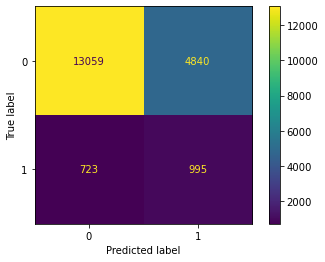

In [85]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

In [86]:
# Most important feature
X.columns[np.argmax(clf.feature_importances_)]

'NoshowRate24NBR'

# Check the parameters accuracy

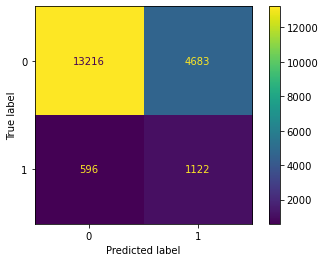

73.08966712545242
20 gini auto 9 2 False 97


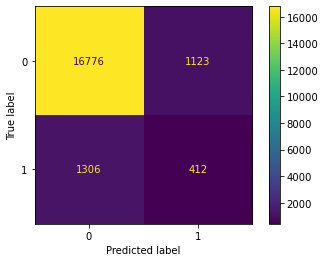

87.61788244889637
13 entropy auto 19 3 False 90


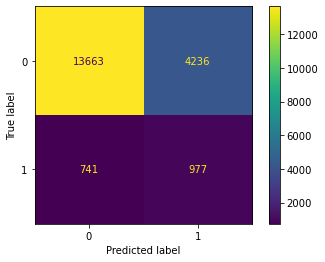

74.6291481877963
3 entropy sqrt 12 2 False 2


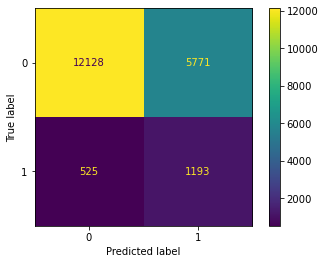

67.9053881837182
15 gini None 3 3 False 87


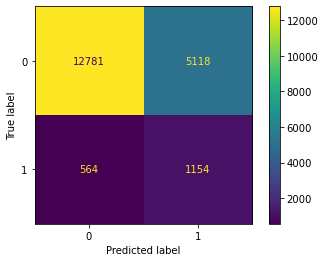

71.03532650252332
18 gini auto 6 2 True 58


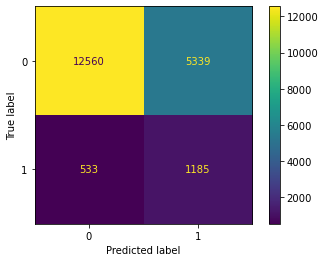

70.06677881429373
16 gini auto 6 4 True 90


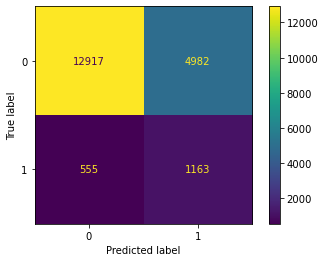

71.77448131722485
17 entropy log2 8 2 True 7


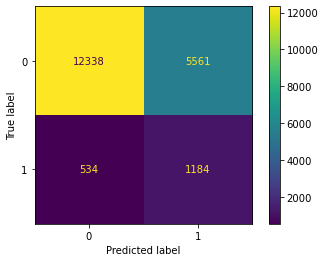

68.93000968547688
6 gini log2 3 3 True 39


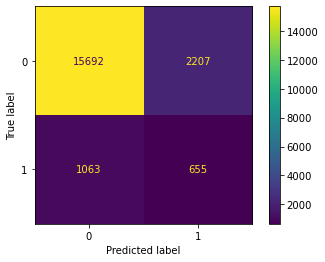

83.33078452362747
6 gini None 16 2 False 27


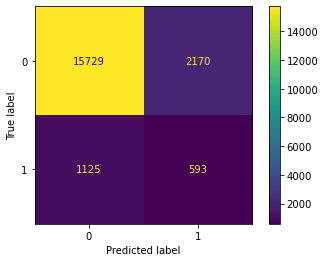

83.2033440383341
3 entropy sqrt 18 3 True 54


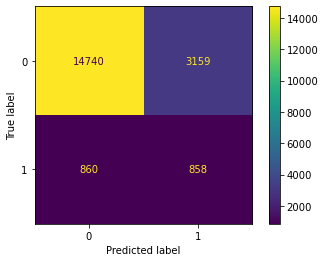

79.51266758423816
8 gini None 13 4 True 54


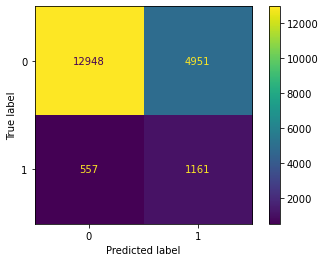

71.92231228016517
20 entropy sqrt 8 3 True 16


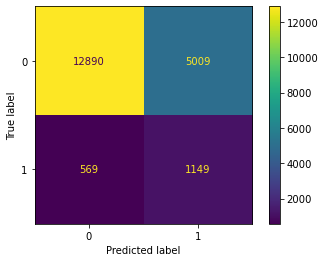

71.56547892134373
20 gini log2 6 2 False 59


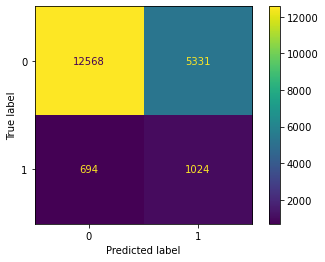

69.28684304429831
2 gini None 3 4 True 3


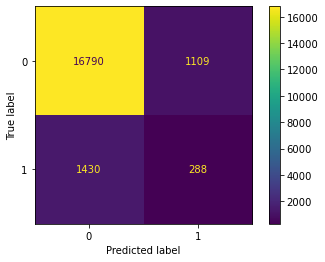

87.05714431360555
2 entropy sqrt 20 2 True 33


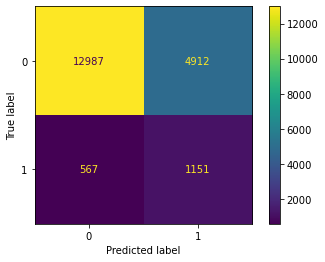

72.07014324310546
10 gini log2 8 2 False 83


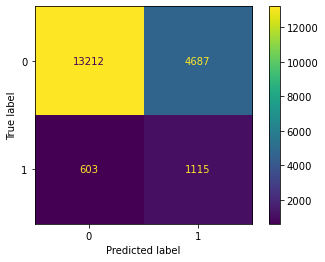

73.03359331192333
8 gini auto 9 3 False 21


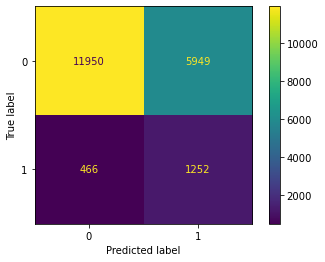

67.29877147372177
3 entropy sqrt 5 2 True 63


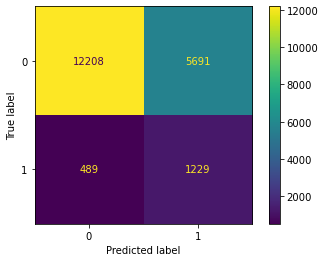

68.49671203547943
13 gini auto 5 3 True 19


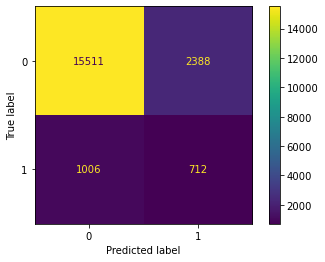

82.69867971657237
14 gini auto 15 4 False 82


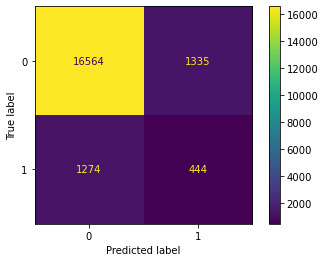

86.70031095478411
9 gini auto 19 4 True 14


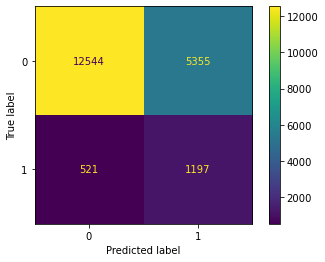

70.04638833664679
9 entropy sqrt 5 3 False 79


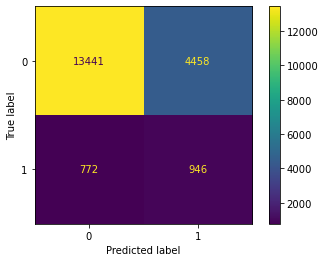

73.3394504766274
16 entropy auto 1 2 True 49


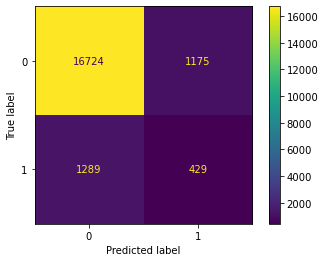

87.43946576948565
15 entropy log2 19 2 False 3


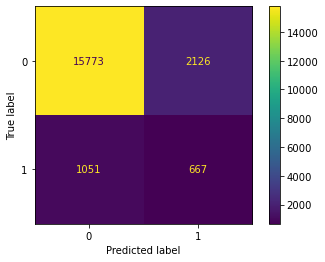

83.8048631289188
15 entropy log2 16 3 False 46


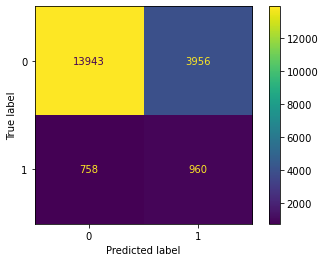

75.96982209308253
3 gini sqrt 12 3 True 62


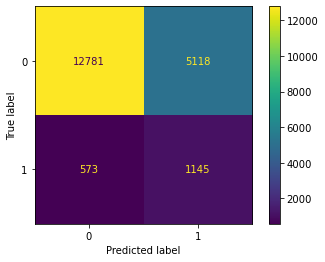

70.98944792781771
5 entropy auto 6 3 True 49


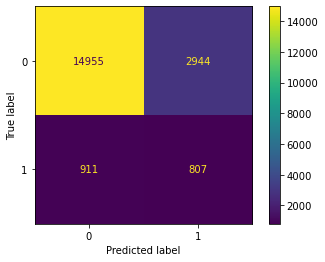

80.34867716776265
9 gini sqrt 14 3 False 78


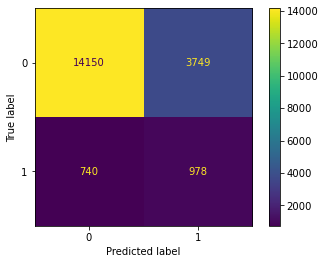

77.11678646072284
9 entropy log2 12 4 False 39


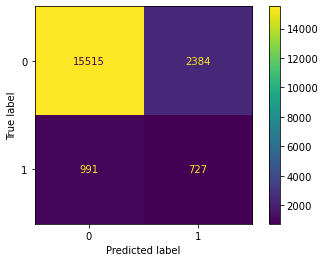

82.79553448539532
16 entropy auto 15 3 False 48


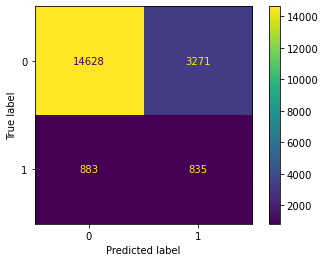

78.82448896365398
4 gini auto 2 3 False 42


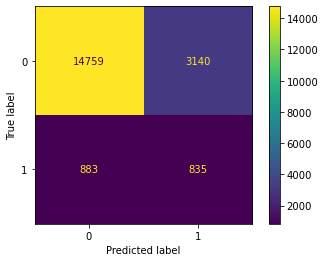

79.49227710659123
5 entropy log2 13 4 False 93


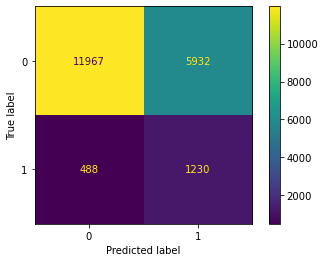

67.2732833766631
3 gini auto 5 2 False 26


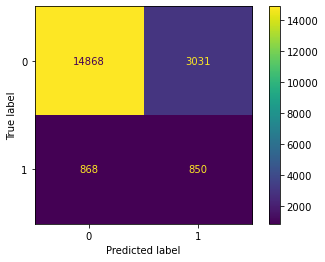

80.12438191364633
15 entropy log2 13 2 False 42


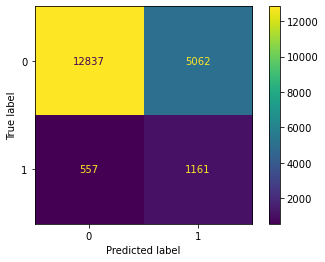

71.35647652546261
8 entropy auto 7 2 True 20


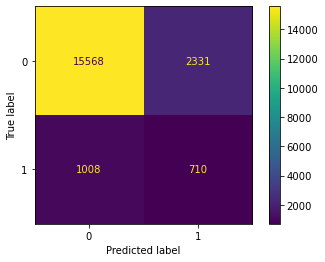

82.97904878421777
11 entropy None 15 2 False 13


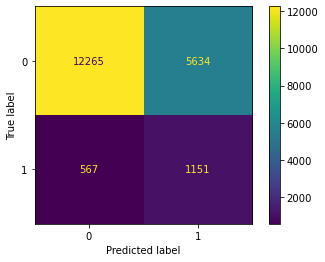

68.389662027833
13 entropy log2 3 3 True 20


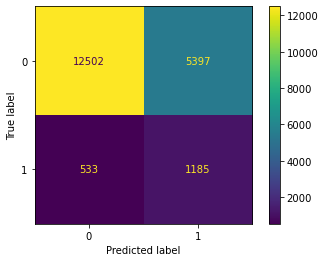

69.7711168884131
8 gini sqrt 6 2 False 72


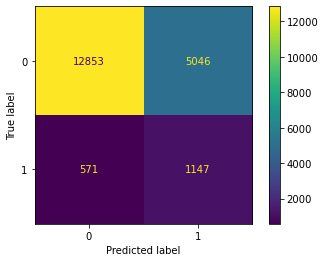

71.36667176428608
6 entropy auto 6 2 True 76


In [88]:
from random import randint
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Writting header to the parameter file
head = ['n_estimators','criterion','max_features','max_depth','min_samples_split','bootstrap','random_state','accuracy_score','f1_score','recall_score']
myFile = open('parameters.csv', 'a', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerow(head)
    del head
myFile.close()               

for i in range(1,40):
    arr = []
    noEstimaters = randint(1,20) # No of estimators default = 10
    criter = ['gini','entropy'] #criterion
    maxFeat = ['auto','sqrt','log2',None] #auto number of features default
    maxDepth = randint(1,20) # Maximum depth of the tree
    minSamplesSplit = randint(2,4) # Default = 2
    bootStrap = [True,False]
    randomState = randint(1,100)
    # print(noEstimaters,criter[randint(0,len(criter)-1)],maxFeat[randint(0,len(maxFeat)-1)],maxDepth,minSamplesSplit,bootStrap[randint(0,len(bootStrap)-1)],randomState)
    arr = [noEstimaters,criter[randint(0,len(criter)-1)],maxFeat[randint(0,len(maxFeat)-1)],maxDepth,minSamplesSplit,bootStrap[randint(0,len(bootStrap)-1)],randomState]
    
    # Training and testing start here
    clf = RandomForestClassifier(n_estimators=noEstimaters,criterion=criter[randint(0,len(criter)-1)],max_features=maxFeat[randint(0,len(maxFeat)-1)],max_depth=maxDepth,min_samples_split=minSamplesSplit,bootstrap=bootStrap,random_state=randomState)
    # Train the model on training data
    clf.fit(X_resampled, y_resampled);
    
    # Use the forest's predict method on the test data
    predictions = clf.predict(X_test)
    
    # Accuracy of the model
    arr.append(accuracy_score(y_test, predictions)*100)
    # f1 score
    arr.append(f1_score(y_test, predictions))
    # recall score
    arr.append(recall_score(y_test, predictions))
    plot_confusion_matrix(clf, X_test, y_test) 
    plt.show()
    print(accuracy_score(y_test, predictions)*100)
    print(noEstimaters,criter[randint(0,len(criter)-1)],maxFeat[randint(0,len(maxFeat)-1)],maxDepth,minSamplesSplit,bootStrap[randint(0,len(bootStrap)-1)],randomState)
    
    myFile = open('parameters.csv', 'a', newline='')
    with myFile:
        writer = csv.writer(myFile)
        writer.writerow(arr)
        del arr